# Residential energy consumption analysis in US in 2009

Data set comes from https://www.eia.gov/consumption/residential/data/2009/index.php?view=microdata

The data set has 12,083 samples, with 940 columns. Columns giving energy consumption information starts from the column KWH, which represent "Total Site Electricity usage, in kilowatt-hours". Lets first predict this variable.

Among all the 838 features (excluding house id), i.e. house location, size, household income, etc., some are categorical variables, while some are not. Detailed information is documented in "public_layout.csv" and "recs2009_public_codebook.xlsx".

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data0=pd.read_csv("recs2009_public.csv")

C:\Users\Xu\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (717,718) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
data0.dtypes

DOEID                   int64
REGIONC                 int64
DIVISION                int64
REPORTABLE_DOMAIN       int64
TYPEHUQ                 int64
NWEIGHT               float64
HDD65                   int64
CDD65                   int64
HDD30YR                 int64
CDD30YR                 int64
Climate_Region_Pub      int64
AIA_Zone                int64
METROMICRO             object
UR                     object
KOWNRENT                int64
CONDCOOP                int64
YEARMADE                int64
YEARMADERANGE           int64
OCCUPYYRANGE            int64
CONVERSION              int64
ORIG1FAM                int64
LOOKLIKE                int64
NUMFLRS                 int64
NUMAPTS                 int64
WALLTYPE                int64
ROOFTYPE                int64
STUDIO                  int64
NAPTFLRS                int64
STORIES                 int64
TYPEHUQ4                int64
                       ...   
TOTALBTUWTH             int64
TOTALBTURFG             int64
TOTALBTUOT

In [5]:
k=data0.dtypes=='O'


In [6]:
object_columns_ind=k[k==True].index
print(object_columns_ind)

Index(['METROMICRO', 'UR', 'NOCRCASH', 'NKRGALNC', 'IECC_Climate_Pub'], dtype='object')


In [7]:
data0[object_columns_ind]

,METROMICRO,UR,NOCRCASH,NKRGALNC,IECC_Climate_Pub
0,METRO,U,-2,-2,4A
1,METRO,U,-2,-2,3C
2,METRO,U,-2,-2,5A
3,METRO,U,-2,-2,5A
4,METRO,U,-2,-2,5A
5,METRO,U,-2,-2,6A-6B
6,METRO,U,-2,-2,4A
7,METRO,U,-2,-2,1A-2A
8,METRO,U,-2,-2,4A
9,METRO,U,-2,-2,4A


In [8]:
for i in range(len(object_columns_ind)):
    print(object_columns_ind[i]+" has unique values of ",data0[object_columns_ind[i]].unique())

METROMICRO has unique values of  ['METRO' 'MICRO' 'NONE']
UR has unique values of  ['U' 'R']
NOCRCASH has unique values of  [-2 1 6 15 4 '-2' '1' '20' '.' '12' '4' '10' '3' '24' '55' '6' 8 28 5 55 3
 16 2 20 10 24 40 12 25]
NKRGALNC has unique values of  [-2 1 5 10 '-2' '10' '15' '1' '8' '.' '5' '3' '2' '77' 30 3 15 8 55 2 20]
IECC_Climate_Pub has unique values of  ['4A' '3C' '5A' '6A-6B' '1A-2A' '3B-4B' '3A' '5B-5C' '7A-7B-7AK-8AK' '2B'
 '4C']


In [9]:
data0['NOCRCASH'][data0.NOCRCASH=='.']=-2
data0['NKRGALNC'][data0.NKRGALNC=='.']=-2

C:\Users\Xu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Xu\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [10]:
data0['NOCRCASH']=pd.to_numeric(data0['NOCRCASH'],downcast='integer')
data0['NKRGALNC']=pd.to_numeric(data0['NKRGALNC'],downcast='integer')

In [11]:
data0['ZPRKGPLC2'].unique()

array([0, 1], dtype=int64)

In [12]:
data0['PRKGPLC2'][data0['ZPRKGPLC2']==1]

1295     0
2774     0
2809     0
3991     0
6839     1
7041     0
7078     0
7253     0
8495     0
9452     0
11552    1
Name: PRKGPLC2, dtype: int64

Not sure what is the difference between "imputed" and not "imputed" in this case. But lets just ignore our ignorance on this.

Below are the type of columns that represent imputations of other features. We will keep these features and possibly remove them in future.

In [13]:
data0.columns[791:827]

Index(['ZHHSEX', 'ZHHAGE', 'ZEMPLOYHH', 'ZSPOUSE', 'ZSDESCENT',
       'ZHouseholder_Race', 'ZEDUCATION', 'ZNHSLDMEM', 'ZAGEHHMEMCAT2',
       'ZAGEHHMEMCAT3', 'ZAGEHHMEMCAT4', 'ZAGEHHMEMCAT5', 'ZAGEHHMEMCAT6',
       'ZAGEHHMEMCAT7', 'ZAGEHHMEMCAT8', 'ZAGEHHMEMCAT9', 'ZAGEHHMEMCAT10',
       'ZAGEHHMEMCAT11', 'ZAGEHHMEMCAT12', 'ZAGEHHMEMCAT13', 'ZAGEHHMEMCAT14',
       'ZHBUSNESS', 'ZATHOME', 'ZTELLWORK', 'ZTELLDAYS', 'ZOTHWORK',
       'ZWORKPAY', 'ZRETIREPY', 'ZSSINCOME', 'ZCASHBEN', 'ZINVESTMT',
       'ZRGLRPAY', 'ZMONEYPY', 'ZHUPROJ', 'ZRENTHELP', 'ZFOODASST'],
      dtype='object')

In [14]:
data0.columns[833:839]

Index(['ZTOTSQFT', 'ZTOTSQFT_EN', 'ZTOTHSQFT', 'ZTOTUSQFT', 'ZTOTCSQFT',
       'ZTOTUCSQFT'],
      dtype='object')

In [15]:
from sklearn import preprocessing
le1=preprocessing.LabelEncoder()
le1.fit(data0['METROMICRO'])
data0['METROMICRO']=le1.transform(data0['METROMICRO'])
data0['METROMICRO'].unique()

array([0, 1, 2], dtype=int64)

In [16]:
le2=preprocessing.LabelEncoder()
le2.fit(data0['UR'])
data0['UR']=le2.transform(data0['UR'])
data0['UR'].unique()

array([1, 0], dtype=int64)

In [17]:
le3=preprocessing.LabelEncoder()
le3.fit(data0['IECC_Climate_Pub'])
data0['IECC_Climate_Pub']=le3.transform(data0['IECC_Climate_Pub'])
data0['IECC_Climate_Pub'].unique()

array([ 5,  4,  7,  9,  0,  3,  2,  8, 10,  1,  6], dtype=int64)

Outputs extraction:

In [18]:
Y=data0[data0.columns[839:919]]
X=data0.drop(data0.columns[839:919], axis=1)
X=X.drop(data0.columns[0],axis=1)

X=X.drop()

from sklearn.cross_validation import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=2)

C:\Users\Xu\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [40]:
from sklearn.ensemble import RandomForestRegressor as RFR

n= 400
oob_errors = []

maxd=[30]

for d in maxd:
#    rfr = RFR(n_estimators=n, criterion="mse", max_depth=15, min_samples_split=2, min_samples_leaf=1,
 #                     min_weight_fraction_leaf=0.0, max_features="auto", max_leaf_nodes=None, min_impurity_decrease=0.001,
  #                    min_impurity_split=None,
   #                   bootstrap=True, oob_score=True, n_jobs=4, random_state=1, verbose=1, warm_start=False)
    rfr=RFR(n_estimators=n,criterion="mse", max_features=0.3, min_samples_leaf=3,min_samples_split=2, max_depth=None, oob_score=True, n_jobs=4)
    rfr.fit(x_train,y_train)
    #y_pred = bag_reg.predict(X_test)
    oob_errors.append(rfr.oob_score_)

[0.5104051400162759]


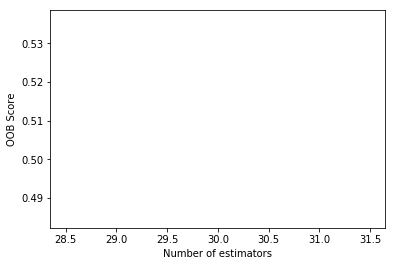

In [41]:
print(oob_errors)
# plot the results

%matplotlib inline
plt.plot(maxd,oob_errors)
plt.xlabel("Number of estimators")
plt.ylabel("OOB Score")
plt.show()


In [42]:
y_pred1=rfr.predict(x_test)

import sklearn.metrics as skm
skm.mean_squared_error(y_test, y_pred1)**0.5

6802.7082307887968

In [43]:
sqe=(y_pred1-y_test)**2
rmse=(np.mean(sqe,axis=0))**0.5/y_test.mean(axis=0)

In [44]:
(np.mean(sqe,axis=0))**0.5

KWH              4794.906578
KWHSPH            813.777041
KWHCOL           1224.992950
KWHWTH            968.275179
KWHRFG            692.140634
KWHOTH           3084.619423
BTUEL           16360.220609
BTUELSPH         2776.609665
BTUELCOL         4179.672130
BTUELWTH         3303.754276
BTUELRFG         2361.582139
BTUELOTH        10524.722766
DOLLAREL          733.237161
DOLELSPH           91.277604
DOLELCOL          164.732219
DOLELWTH          110.365660
DOLELRFG          112.761729
DOLELOTH          502.977418
CUFEETNG          210.138435
CUFEETNGSPH       147.541715
CUFEETNGWTH        81.879013
CUFEETNGOTH        87.858744
BTUNG           21539.196775
BTUNGSPH        15123.028443
BTUNGWTH         8392.609932
BTUNGOTH         9005.524640
DOLLARNG          263.512744
DOLNGSPH          182.354189
DOLNGWTH          104.170490
DOLNGOTH          103.227151
                    ...     
DOLLARFO          185.185389
DOLFOSPH          172.506233
DOLFOWTH           63.949741
DOLFOOTH      

(0, 40000)

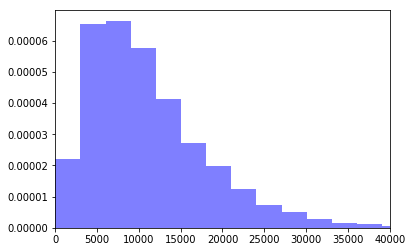

In [45]:
#data0['KWH']
plt.figure()
plt.hist(data0['KWH'], 50, normed=1, facecolor='blue', alpha=0.5)
plt.plot()
plt.xlim(0,40000)

In [46]:
skm.r2_score(y_test['KWH'],y_pred1[:,0])

0.59806558866900417